In [1]:
pwd


'C:\\Users\\Mehuli'

In [9]:
import mne
import os
import scipy.io
import numpy as np
import matplotlib 
import pandas as pd


In [13]:
df = pd.read_pickle(r"C:\Users\Mehuli\Downloads\Alice.pkl")

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 172
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   trialno          171 non-null    int32 
 1   eeg              171 non-null    object
 2   eegTime          171 non-null    object
 3   filename         171 non-null    object
 4   response         171 non-null    object
 5   RT               171 non-null    object
 6   condition        171 non-null    object
 7   envelop          171 non-null    object
 8   phonemeRate      171 non-null    object
 9   phonemeDuration  171 non-null    object
 10  answerIndex      171 non-null    object
 11  answerTime       171 non-null    object
 12  time             171 non-null    object
 13  Trial_len        171 non-null    object
 14  jawaopening      171 non-null    object
 15  lipaparature     171 non-null    object
 16  lipProtrusion    171 non-null    object
 17  TBCD             171 non-null    ob

In [18]:
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from mne.datasets import somato

In [1]:
import mne
import os
import scipy.io
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal
from scipy import stats
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
from itertools import permutations,combinations
from IPython.display import clear_output
import seaborn as sns
from scipy.linalg import toeplitz
from numpy import linalg as LA
from mne.event import define_target_events
from operator import itemgetter


In [9]:
pwd


'C:\\Users\\Mehuli'

In [11]:
with open('Alice_eegEMAdownsampled_100.pkl', 'rb') as m:
    x = pickle.load(m)

In [12]:
x

,trialno,eeg,eegTime,filename,response,RT,condition,envelop,phonemeRate,phonemeDuration,...,Trial_len,jawaopening,lipaparature,lipProtrusion,TBCD,TMCD,TTCD,TB_ui,TM_ui,TT_ui
0,1,"[[2.2243974556538713, 12.404519333926135, 16.2...","[3.3025, -1.4782, -0.252, -0.9614, -0.4397, -0...",olm_26_1,0,1327.0,1,"[-0.00010037155361867451, 0.000164169546234248...",11.686747,0.085642,...,8.3,"[0.032319593219340643, 0.033705886895497486, 0...","[0.019498594794729405, 0.01924270175323214, 0....","[0.02001806774544584, 0.016975783885240864, 0....","[0.030597250427387437, 0.048810026970132904, 0...","[0.04017631924864266, 0.05811813941909484, 0.0...","[0.050404742323600545, 0.08352384441501484, 0....","[0.0380267569001387, 0.041380816423382226, 0.0...","[0.038759114322139104, 0.046256907827073646, 0...","[0.04510932512842603, 0.06394771444002059, 0.0..."
1,2,"[[2.0044986480941125, -3.5249477280523562, -2....","[0.9325, -1.0117, -0.5052, -0.7891, -0.57, -0....",olm_56_7,0,1167.0,3,"[0.000540998020782738, -8.187566008573984e-05,...",18.771331,0.053214,...,2.93,"[0.06393302741898052, 0.07204162076304013, 0.0...","[0.06123737820627736, 0.08257737389021504, 0.0...","[0.051385032943965625, 0.055807209445187515, 0...","[0.05494643513980542, 0.07211006322425169, 0.0...","[0.07307940894640423, 0.10418823651179608, 0.0...","[0.09660915886884412, 0.15452395854788464, 0.1...","[0.061439347804017753, 0.06568484102189526, 0....","[0.06479837278823862, 0.07695793696666388, 0.0...","[0.0812455202639574, 0.11427208321893448, 0.10..."
2,3,"[[-1.989579581775545, -6.713491982603861, -1.6...","[1.271, -1.0784, -0.469, -0.8138, -0.5513, -0....",n_olm_361,0,1779.0,2,"[7.554100318956434e-06, 0.0006326273885021445,...",10.899183,0.091734,...,3.67,"[0.0642369578548522, 0.07647865495194121, 0.07...","[0.07771467263875195, 0.11988296920373531, 0.1...","[0.09940790024647486, 0.18421900386072232, 0.1...","[0.06856857842325391, 0.08466730031576104, 0.0...","[0.0662397452216304, 0.08240805406192785, 0.07...","[0.08438167242207488, 0.12642623600033576, 0.1...","[0.05094508100350859, 0.05166840500132506, 0.0...","[0.05340425960499531, 0.058584276623677094, 0....","[0.0689638131557238, 0.08752781869048931, 0.08..."
3,4,"[[3.65729098302815, 12.382125161052995, 9.2093...","[1.2745, -1.079, -0.4686, -0.814, -0.5511, -0....",n_olm_361,0,1278.0,2,"[7.554100318956434e-06, 0.0006326273885021445,...",10.899183,0.091734,...,3.67,"[0.0642369578548522, 0.07647865495194121, 0.07...","[0.07771467263875195, 0.11988296920373531, 0.1...","[0.09940790024647486, 0.18421900386072232, 0.1...","[0.06856857842325391, 0.08466730031576104, 0.0...","[0.0662397452216304, 0.08240805406192785, 0.07...","[0.08438167242207488, 0.12642623600033576, 0.1...","[0.05094508100350859, 0.05166840500132506, 0.0...","[0.05340425960499531, 0.058584276623677094, 0....","[0.0689638131557238, 0.08752781869048931, 0.08..."
4,5,"[[1.475924575636111, -0.7942308971427563, -0.1...","[0.688, -0.9635, -0.5314, -0.7713, -0.5835, -0...",n_olm_254,0,1313.0,2,"[0.00027293296265098815, 0.0010151522834784682...",10.970464,0.091115,...,2.37,"[0.06309553936610532, 0.0646737461135028, 0.06...","[0.05597704523663049, 0.07668386769209459, 0.0...","[0.02598783499109089, 0.038622826480820896, 0....","[0.04023482805911612, 0.056175722703717006, 0....","[0.03321678557641088, 0.03788815851263843, 0.0...","[0.02230863348217216, 0.020608013450270773, 0....","[0.05742501655061877, 0.05801960977354825, 0.0...","[0.051977138844317684, 0.0517548400227059, 0.0...","[0.05190624756650298, 0.05214771801136161, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,195,"[[-1.6396336092806718, 2.6278609778943354, 2.3...","[1.0885, -1.042, -0.489, -0.8, -0.5619, -0.728...",olm_43_7,0,1425.0,3,"[0.00021163169722020227, 0.0011062347915636922...",16.717325,0.059945,...,3.29,"[0.0552262772307175, 0.05885065221252121, 0.05...","[0.05350279443242076, 0.06497286148620109, 0.0...","[0.05765888488895267, 0.065502672279007

In [13]:
feat = pd.read_pickle('Alice_eegEMAdownsampled_100.pkl')

In [14]:
feat

,trialno,eeg,eegTime,filename,response,RT,condition,envelop,phonemeRate,phonemeDuration,...,Trial_len,jawaopening,lipaparature,lipProtrusion,TBCD,TMCD,TTCD,TB_ui,TM_ui,TT_ui
0,1,"[[2.2243974556538713, 12.404519333926135, 16.2...","[3.3025, -1.4782, -0.252, -0.9614, -0.4397, -0...",olm_26_1,0,1327.0,1,"[-0.00010037155361867451, 0.000164169546234248...",11.686747,0.085642,...,8.3,"[0.032319593219340643, 0.033705886895497486, 0...","[0.019498594794729405, 0.01924270175323214, 0....","[0.02001806774544584, 0.016975783885240864, 0....","[0.030597250427387437, 0.048810026970132904, 0...","[0.04017631924864266, 0.05811813941909484, 0.0...","[0.050404742323600545, 0.08352384441501484, 0....","[0.0380267569001387, 0.041380816423382226, 0.0...","[0.038759114322139104, 0.046256907827073646, 0...","[0.04510932512842603, 0.06394771444002059, 0.0..."
1,2,"[[2.0044986480941125, -3.5249477280523562, -2....","[0.9325, -1.0117, -0.5052, -0.7891, -0.57, -0....",olm_56_7,0,1167.0,3,"[0.000540998020782738, -8.187566008573984e-05,...",18.771331,0.053214,...,2.93,"[0.06393302741898052, 0.07204162076304013, 0.0...","[0.06123737820627736, 0.08257737389021504, 0.0...","[0.051385032943965625, 0.055807209445187515, 0...","[0.05494643513980542, 0.07211006322425169, 0.0...","[0.07307940894640423, 0.10418823651179608, 0.0...","[0.09660915886884412, 0.15452395854788464, 0.1...","[0.061439347804017753, 0.06568484102189526, 0....","[0.06479837278823862, 0.07695793696666388, 0.0...","[0.0812455202639574, 0.11427208321893448, 0.10..."
2,3,"[[-1.989579581775545, -6.713491982603861, -1.6...","[1.271, -1.0784, -0.469, -0.8138, -0.5513, -0....",n_olm_361,0,1779.0,2,"[7.554100318956434e-06, 0.0006326273885021445,...",10.899183,0.091734,...,3.67,"[0.0642369578548522, 0.07647865495194121, 0.07...","[0.07771467263875195, 0.11988296920373531, 0.1...","[0.09940790024647486, 0.18421900386072232, 0.1...","[0.06856857842325391, 0.08466730031576104, 0.0...","[0.0662397452216304, 0.08240805406192785, 0.07...","[0.08438167242207488, 0.12642623600033576, 0.1...","[0.05094508100350859, 0.05166840500132506, 0.0...","[0.05340425960499531, 0.058584276623677094, 0....","[0.0689638131557238, 0.08752781869048931, 0.08..."
3,4,"[[3.65729098302815, 12.382125161052995, 9.2093...","[1.2745, -1.079, -0.4686, -0.814, -0.5511, -0....",n_olm_361,0,1278.0,2,"[7.554100318956434e-06, 0.0006326273885021445,...",10.899183,0.091734,...,3.67,"[0.0642369578548522, 0.07647865495194121, 0.07...","[0.07771467263875195, 0.11988296920373531, 0.1...","[0.09940790024647486, 0.18421900386072232, 0.1...","[0.06856857842325391, 0.08466730031576104, 0.0...","[0.0662397452216304, 0.08240805406192785, 0.07...","[0.08438167242207488, 0.12642623600033576, 0.1...","[0.05094508100350859, 0.05166840500132506, 0.0...","[0.05340425960499531, 0.058584276623677094, 0....","[0.0689638131557238, 0.08752781869048931, 0.08..."
4,5,"[[1.475924575636111, -0.7942308971427563, -0.1...","[0.688, -0.9635, -0.5314, -0.7713, -0.5835, -0...",n_olm_254,0,1313.0,2,"[0.00027293296265098815, 0.0010151522834784682...",10.970464,0.091115,...,2.37,"[0.06309553936610532, 0.0646737461135028, 0.06...","[0.05597704523663049, 0.07668386769209459, 0.0...","[0.02598783499109089, 0.038622826480820896, 0....","[0.04023482805911612, 0.056175722703717006, 0....","[0.03321678557641088, 0.03788815851263843, 0.0...","[0.02230863348217216, 0.020608013450270773, 0....","[0.05742501655061877, 0.05801960977354825, 0.0...","[0.051977138844317684, 0.0517548400227059, 0.0...","[0.05190624756650298, 0.05214771801136161, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,195,"[[-1.6396336092806718, 2.6278609778943354, 2.3...","[1.0885, -1.042, -0.489, -0.8, -0.5619, -0.728...",olm_43_7,0,1425.0,3,"[0.00021163169722020227, 0.0011062347915636922...",16.717325,0.059945,...,3.29,"[0.0552262772307175, 0.05885065221252121, 0.05...","[0.05350279443242076, 0.06497286148620109, 0.0...","[0.05765888488895267, 0.065502672279007

In [15]:

data_path = os.path.dirname(os.path.dirname(os.getcwd()))

In [16]:
data_path

'C:\\'

In [18]:
save_path = data_path + '\mehuli\mne_data'

In [19]:
save_path

'C:\\\\mehuli\\mne_data'

In [20]:
feat['eeg'].shape

(171,)

In [21]:
feat['eegTime'].iloc[0]

array([ 3.3025e+00, -1.4782e+00, -2.5200e-01, -9.6140e-01, -4.3970e-01,
       -8.2690e-01, -4.9240e-01, -7.5670e-01, -5.0920e-01, -7.0860e-01,
       -5.1140e-01, -6.7060e-01, -5.0620e-01, -6.3820e-01, -4.9680e-01,
       -6.0910e-01, -4.8480e-01, -5.8210e-01, -4.7100e-01, -5.5650e-01,
       -4.5600e-01, -5.3210e-01, -4.4010e-01, -5.0840e-01, -4.2350e-01,
       -4.8530e-01, -4.0630e-01, -4.6260e-01, -3.8880e-01, -4.4030e-01,
       -3.7100e-01, -4.1840e-01, -3.5280e-01, -3.9660e-01, -3.3450e-01,
       -3.7510e-01, -3.1600e-01, -3.5370e-01, -2.9730e-01, -3.3240e-01,
       -2.7850e-01, -3.1130e-01, -2.5960e-01, -2.9030e-01, -2.4050e-01,
       -2.6940e-01, -2.2140e-01, -2.4860e-01, -2.0230e-01, -2.2780e-01,
       -1.8300e-01, -2.0710e-01, -1.6370e-01, -1.8640e-01, -1.4440e-01,
       -1.6580e-01, -1.2500e-01, -1.4520e-01, -1.0560e-01, -1.2470e-01,
       -8.6100e-02, -1.0420e-01, -6.6600e-02, -8.3700e-02, -4.7100e-02,
       -6.3300e-02, -2.7500e-02, -4.2900e-02, -7.9000e-03, -2.25

In [22]:
feat['eegTime']

0      [3.3025, -1.4782, -0.252, -0.9614, -0.4397, -0...
1      [0.9325, -1.0117, -0.5052, -0.7891, -0.57, -0....
2      [1.271, -1.0784, -0.469, -0.8138, -0.5513, -0....
3      [1.2745, -1.079, -0.4686, -0.814, -0.5511, -0....
4      [0.688, -0.9635, -0.5314, -0.7713, -0.5835, -0...
                             ...                        
168    [1.0885, -1.042, -0.489, -0.8, -0.5619, -0.728...
169    [0.911, -1.0075, -0.5075, -0.7876, -0.5712, -0...
170    [1.9565, -1.2134, -0.3956, -0.8638, -0.5135, -...
171    [0.8525, -0.9955, -0.5143, -0.7828, -0.5749, -...
172    [1.786, -1.1798, -0.4139, -0.8513, -0.5229, -0...
Name: eegTime, Length: 171, dtype: object

In [23]:
feat['eegTime'].shape

(171,)

In [24]:
feat['eegTime'].iloc[0].shape

(890,)

In [25]:
feat['eeg'].iloc[0].shape

(59, 890)

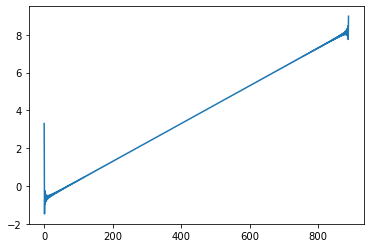

In [26]:
plt.plot(feat['eegTime'].iloc[0])

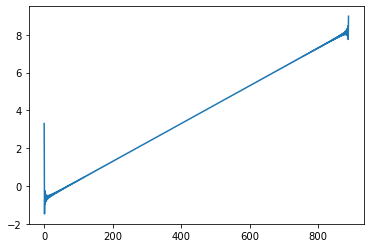

In [27]:
plt.plot(feat['eegTime'].iloc[0])

In [28]:
feat.info

<bound method DataFrame.info of      trialno                                                eeg  \
0          1  [[2.2243974556538713, 12.404519333926135, 16.2...   
1          2  [[2.0044986480941125, -3.5249477280523562, -2....   
2          3  [[-1.989579581775545, -6.713491982603861, -1.6...   
3          4  [[3.65729098302815, 12.382125161052995, 9.2093...   
4          5  [[1.475924575636111, -0.7942308971427563, -0.1...   
..       ...                                                ...   
168      195  [[-1.6396336092806718, 2.6278609778943354, 2.3...   
169      196  [[-0.15020298863300735, 0.030623684665795885, ...   
170      198  [[-4.0706306820188685, -0.3494079009651656, -2...   
171      199  [[3.917968740194692, -0.10624617174654047, -4....   
172      200  [[5.887919018981268, 5.928475955621999, 7.0640...   

                                               eegTime   filename response  \
0    [3.3025, -1.4782, -0.252, -0.9614, -0.4397, -0...   olm_26_1        0   
1    [0

In [30]:
np.min(feat['eegTime'].iloc[0])

-1.4782

In [31]:
np.max(feat['eegTime'].iloc[0])

8.9752

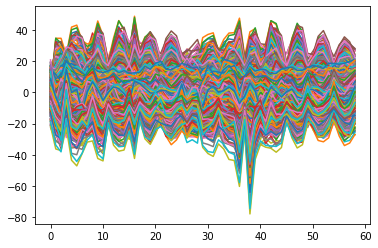

In [32]:
plt.plot(feat['eeg'].iloc[0])

In [33]:
feat['eegTime'].iloc[0]

array([ 3.3025e+00, -1.4782e+00, -2.5200e-01, -9.6140e-01, -4.3970e-01,
       -8.2690e-01, -4.9240e-01, -7.5670e-01, -5.0920e-01, -7.0860e-01,
       -5.1140e-01, -6.7060e-01, -5.0620e-01, -6.3820e-01, -4.9680e-01,
       -6.0910e-01, -4.8480e-01, -5.8210e-01, -4.7100e-01, -5.5650e-01,
       -4.5600e-01, -5.3210e-01, -4.4010e-01, -5.0840e-01, -4.2350e-01,
       -4.8530e-01, -4.0630e-01, -4.6260e-01, -3.8880e-01, -4.4030e-01,
       -3.7100e-01, -4.1840e-01, -3.5280e-01, -3.9660e-01, -3.3450e-01,
       -3.7510e-01, -3.1600e-01, -3.5370e-01, -2.9730e-01, -3.3240e-01,
       -2.7850e-01, -3.1130e-01, -2.5960e-01, -2.9030e-01, -2.4050e-01,
       -2.6940e-01, -2.2140e-01, -2.4860e-01, -2.0230e-01, -2.2780e-01,
       -1.8300e-01, -2.0710e-01, -1.6370e-01, -1.8640e-01, -1.4440e-01,
       -1.6580e-01, -1.2500e-01, -1.4520e-01, -1.0560e-01, -1.2470e-01,
       -8.6100e-02, -1.0420e-01, -6.6600e-02, -8.3700e-02, -4.7100e-02,
       -6.3300e-02, -2.7500e-02, -4.2900e-02, -7.9000e-03, -2.25